## Datavisualization

The package only contains methods to simplify your code, so it doesn't cover all steps of machine learning process, but only those that save you lines of code.

In [1]:
#!pip install smltk==2.2.4

# import os
# import sys
# sys.path.insert(1, os.getcwd() + '/../../../')
# print(os.getcwd())
# print(sys.path)

from smltk.datavisualization import DataVisualization
dv = DataVisualization()

### Example with sklearn library - iris dataset

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

#### Datavisualization

In [3]:
dv.get_df(data).head(5)

,target,target_name,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,setosa,5.1,3.5,1.4,0.2
1,0,setosa,4.9,3.0,1.4,0.2
2,0,setosa,4.7,3.2,1.3,0.2
3,0,setosa,4.6,3.1,1.5,0.2
4,0,setosa,5.0,3.6,1.4,0.2


#### Preprocessing

In [4]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=5)

#### Modeling

In [5]:
# fitting
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=3)
_ = model.fit(X_train, y_train)

In [6]:
# testing
y_pred = model.predict(X_test)

#### Datavisualization

In [7]:
dv.get_inference_df(data, X_test, y_test, y_pred).head(5)

,prediction,target,target_name,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1,1,versicolor,5.8,2.7,3.9,1.2
1,2,2,virginica,6.1,2.6,5.6,1.4
2,2,2,virginica,5.8,2.8,5.1,2.4
3,0,0,setosa,4.4,3.2,1.3,0.2
4,2,2,virginica,7.2,3.6,6.1,2.5


### Example with torch library - image dataset

In [8]:
from PIL import Image
import requests
import torchvision.transforms as transforms
import torch

In [9]:
url = 'https://www.projectinvictus.it/wp-content/uploads/2022/08/junk-food-scaled.jpg'
im = Image.open(requests.get(url, stream=True).raw)

#### Preprocessing

In [10]:
# data preparation
transform = transforms.Compose([
    transforms.Resize(800),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
img = transform(im).unsqueeze(0)

#### Modeling

In [11]:
# load pre-trained model instead to train it
model = torch.hub.load('facebookresearch/detr', 'detr_resnet50', pretrained=True)
model.eval();

Downloading: "https://github.com/facebookresearch/detr/zipball/main" to /Users/alessandrabilardi/.cache/torch/hub/main.zip
/Users/alessandrabilardi/.env/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/alessandrabilardi/.env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/alessandrabilardi/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:17<00:00, 5.88MB/s]
Downloading

In [12]:
# fitting
prediction = model(img)
probability, boxes = dv.get_inference_objects(im, prediction, 0.7)

#### Datavisualization

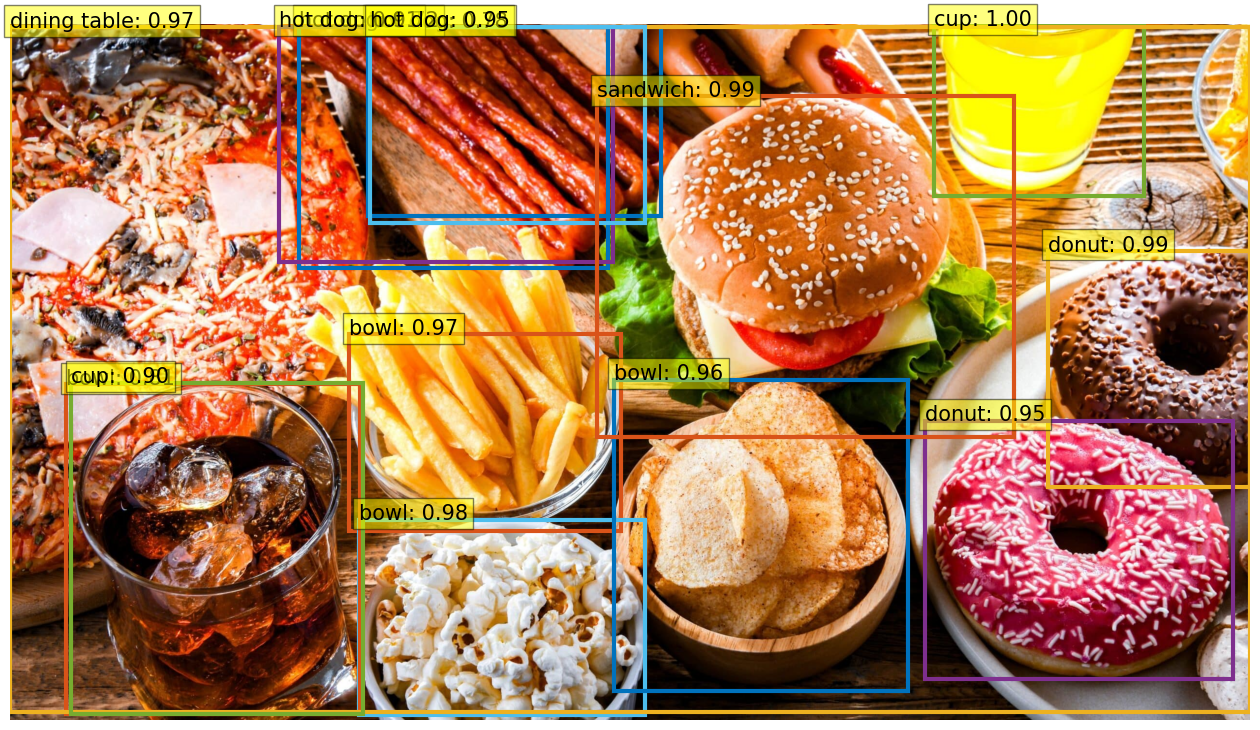

In [13]:
# plot image with objects detected
dv.plot_inference_objects(im, probability, boxes)

In [14]:
# pretty view of prediction
dv.get_inference_objects_df(probability, boxes)

,class,probability,xmin,ymin,xmax,ymax
0,hot dog,0.78,739.590759,4.523316,1344.510376,395.904053
0,bowl,0.97,699.247131,638.954041,1261.174194,1045.508179
0,donut,0.99,2141.856445,466.965820,2560.113770,953.491577
0,donut,0.95,1887.853882,817.318176,2523.982178,1350.933838
0,cup,1.00,1906.175659,1.160514,2341.208008,353.244568
0,bowl,0.98,719.522034,1021.572998,1311.215698,1424.837524
0,hot dog,0.72,595.944702,4.205790,1233.215332,501.827728
0,bowl,0.81,115.647903,742.659485,723.069397,1422.455200
0,dining table,0.97,-0.465622,4.839301,2559.093018,1419.149414
0,hot dog,0.91,555.372986,3.777615,1245.069092,489.342651
